In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/lawsdiv`


In [2]:
using Random, Distributions, SpecialFunctions
using Plots, Measures
using LinearAlgebra

In [3]:
include("./models.jl")
using .GenerativeModels

include("./Distributions.jl")
using .PlotDistributions

# Distributions

In [5]:
# Set global parameters
N_species = 500
Δt = 0.01
n = 250000
skip = 500
ε = 1e-9
max_lag = Int64(floor(n / skip / 10))
miss = Int64(floor(n / skip)) # perform analysis for those species for which n. of non-missing entries is > miss
lags = [0, 2, 5, 10];

### Stochastic Logistic model

In [8]:
Random.seed!(1234)

# Set conditions for temporal analysis
K = 1000 .* rand(N_species)
# Pass y0 = K to the model so it is already at staedy state

# Solve model
data = GenerativeModels.logistic_growth(N_species, K, Δt, n; r=1.0, K=K, σ=1.0, ε=ε, skip=skip)
max_lag = Int64(floor(size(data,1) / 10))
println("Extincted species: ", count(iszero.(data[end,:])))

Extincted species: 0


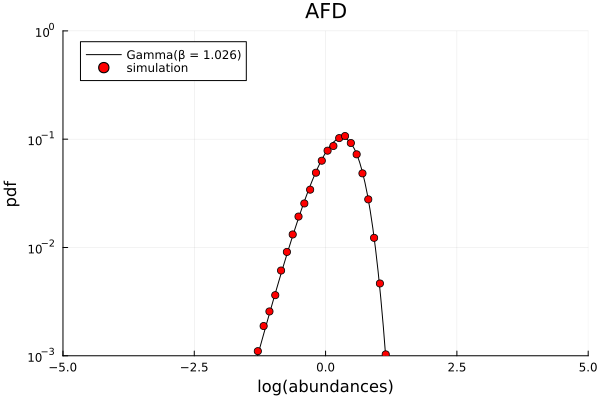

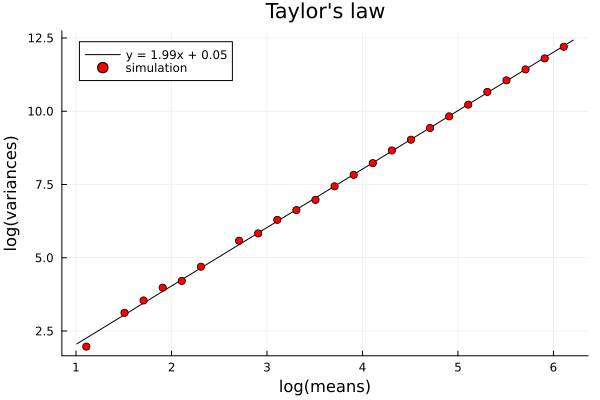

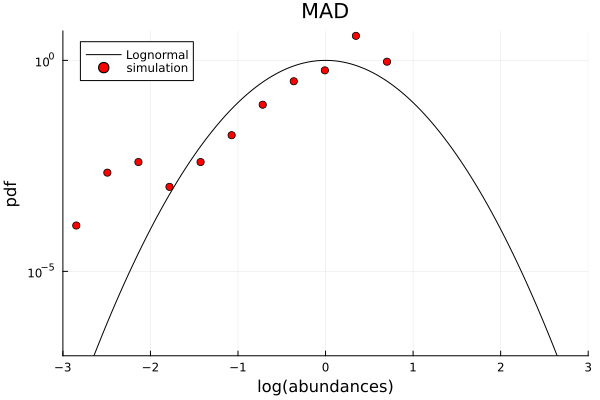

In [11]:
# Compute distributions
afd = PlotDistributions.make_AFD(data; missing_thresh=miss, Δb=0.2, plot_fig=true, plot_title="AFD", data_label="simulation")
taylor = PlotDistributions.make_Taylor(data; missing_thresh=miss, Δb=0.2, plot_fig=true, plot_title="Taylor's law", data_label="simulation")
mad = PlotDistributions.make_MAD(data; missing_thresh=miss, Δb=0.2, plot_fig=true, plot_title="MAD", data_label="simulation")
# crosscorr = PlotDistributions.make_lagCrossCorr(data; Δb=0.05, missing_thresh=miss, lags=lags, make_log=true, plot_fig=true, plot_title="Cross-Correlation")
# lagcorr = PlotDistributions.make_lagCorr(data; missing_thresh=miss, max_lag=max_lag, make_log=true, plot_fig=true, plot_title="Auto-Correlation", data_label="simulation")
# psd = PlotDistributions.make_PSD(data; Δt=Δt, missing_thresh=miss, freq_range=(-0.6,1.2), make_log=true, plot_fig=true, plot_title="Power Spectrum Density", data_label="simulation")

fig = afd["fig"]
display(fig)
# savefig(fig, "./Images/SLM_AFD_skip1.png")

fig = taylor["fig"]
display(fig)
# savefig(fig, "./Images/SLM_Taylor_skip1.png")

fig = mad["fig"]
display(fig)
# savefig("./Images/SLM_MAD_skip1.png")

# fig = crosscorr["fig"]
# display(fig)
# savefig("./Images/SLM_crosscorr_skip1.png")

# fig = lagcorr["fig"]
# display(fig)
# savefig("./Images/SLM_autocorr_skip1.png")

# fig = psd["fig"]
# display(fig)
# savefig("./Images/SLM_PSD_skip1.png")

### Stochastic Lotka Volterra

In [12]:
Random.seed!(1234)

# Set conditions for temporal analysis
K = 1000 .* rand(N_species)
ρ = 1 / (N_species)
A = GenerativeModels.sparse_gaussian_matrix(K, ρ; μ=-2/N_species, σ=1/N_species)

# Solve model
data = GenerativeModels.lotka_volterra(N_species, K, Δt, n; r=1.0, A=Matrix(A), σ=1.0, ε=ε, skip=skip)
println("Extincted species: ", count(iszero.(data[end,:])))

A

Extincted species: 1


500×500 SparseArrays.SparseMatrixCSC{Float64, Int64} with 994 stored entries:
⎡⠑⢄⠀⠈⠀⠀⠀⢀⠀⠀⠀⠀⡀⠀⠀⠀⠈⠀⠀⠈⠀⠀⠐⠀⠠⢊⠐⠀⠐⠀⠀⠂⠠⠄⠀⠒⠠⠀⠀⡀⎤
⎢⠁⠀⠑⢅⡀⠀⠀⠂⠀⠀⠀⠀⠀⠀⠂⠈⢁⠀⠤⠀⠀⠈⢐⠍⠁⠀⠀⡀⢀⠀⠁⠀⠀⠀⠀⠀⠀⠀⡁⠈⎥
⎢⠀⠀⢀⠀⡑⢄⠆⠀⠀⠀⠒⠀⠁⠀⠄⠀⠀⠀⠀⠁⢀⠈⠂⠀⠀⠄⠀⡠⢀⠀⠂⠀⠀⠀⠀⠄⠨⠐⡀⠁⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠄⠀⠀⠀⠀⠁⠀⠀⠀⠁⠀⠀⠀⠁⠀⠀⠈⠀⠀⠀⠄⠀⠁⠀⠀⠀⣄⠀⠀⠂⠈⠀⎥
⎢⢈⡀⠀⠈⡠⠀⠂⠀⠑⢄⠐⠀⠀⠀⢂⠀⢈⠀⠈⠀⠀⠀⠀⠄⠘⠈⠀⠀⠁⠐⠀⠁⠀⠀⠀⠄⠠⠁⠁⠈⎥
⎢⠀⠀⠄⣀⠄⠀⠐⠁⢁⠀⢑⢄⠀⢐⠀⠀⠀⠀⠁⠠⠄⠀⠢⠉⡄⠀⠐⠀⠸⠄⠀⠨⡀⠈⠀⠔⠀⠀⠀⠄⎥
⎢⠀⠀⠈⡀⠈⠘⠀⠀⠀⠀⠀⠄⠑⢄⠂⠀⠀⠀⠀⠂⠘⠠⠂⠁⠃⠀⠀⠀⠀⠐⠄⠀⠠⠀⣀⠀⠐⠀⠀⡀⎥
⎢⠀⠁⢀⠀⠀⠀⠁⠀⠀⠀⡠⡀⠄⢀⠑⢄⠄⠀⠀⠄⠀⠠⠐⠀⢀⠁⠀⡀⠀⠀⠉⠋⢀⠢⠀⠀⡠⠀⠀⠀⎥
⎢⠐⡀⠐⠥⠀⠀⠁⠂⣂⠃⠀⠀⠀⢊⠂⠀⠑⢄⠀⠂⠐⠠⡀⠀⠀⠘⠑⠁⠀⠄⠀⠀⠀⠀⠈⠀⠀⠀⠂⠄⎥
⎢⠀⠀⠑⠀⣀⠀⠁⠂⠤⠀⡀⠀⠀⠉⠄⠆⠰⠀⠑⢤⢀⠀⢀⢙⠀⠀⠀⠀⠂⠃⠀⠀⠀⠄⠀⠴⠀⠀⠈⠀⎥
⎢⠀⢀⠤⠠⠀⠀⠈⠁⠀⢀⠀⠀⠀⠃⠒⠀⠀⠀⠀⠈⠑⢅⠂⠠⠂⠄⠀⠢⠀⠄⠂⠀⠐⠀⠄⠀⠠⠐⠠⡀⎥
⎢⢀⠀⠀⠀⠀⠀⠀⠀⠡⠀⠀⠂⠨⠀⠀⡀⠄⠀⠐⠀⡀⠀⠑⢄⠁⠈⠃⡀⠡⠀⠀⠀⠐⡁⠈⠐⠀⠀⠠⠀⎥
⎢⠀⠠⢀⠀⠠⠁⠢⠀⠀⠊⠂⠀⠀⡄⠈⠀⡀⠀⠀⠀⠆⡀⠃⠐⠑⢄⠀⠀⠉⠀⠀⠀⠀⠀⠀⢐⠀⠁⠀⠀⎥
⎢⠀⠂⠄⠈⠀⡂⠀⠀⠀⠋⠀⠀⢀⠀⠀⠀⠈⢀⠀⠄⠁⠀⠡⠠⠀⠉⠕⢄⢄⠔⠀⠀⠀⠀⠂⠀⡂⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⡆⠂⠀⠈⠀⢀⠀⠀⠀⠄⢁⠁⠐⠀⠀⠀⠐⠘⠑⠀⢀⡀⠂⠓⢄⠀⠠⠀⠐⠀⠀⠀⠀⠂⠀⎥
⎢⠘⠀⠀⠄⢀⢄⠀⠀⢀⠜⠀⠀⠀⠀⠀⢀⠠⠀⠀⡤⠄⠀⠔⢁⠀⠀⠀⠀⠘⠀⠑⢄⠀⠀⠈⠀⠀⠄⡀⠄⎥
⎢⠀⠀⠀⠆⠌⠄⠠⠀⠀⠐⠀⠀⠈⠀⠈⠄⠀⠈⠐⠀⠐⠀⠀⠀⠀⠀⢁⠀⠈⠀⠀⠀⠕⢄⠄⠂⠀⠀⠀⠀⎥
⎢⠄⠀⠁⠅⠀⠀⠠⠐⠄⢀⠀⠀⠀⢀⢀⠀⠀⢠⠀⠀⠄⢀⠀⠀⠀⠑⠠⠀⠀⠀⠀⠀⠢⠀⠑⢅⢀⠀⠀⠒⎥
⎢⠀⠃⠁⠢⠀⠀⠀⠀⠈⠀⠂⡁⠤⠀⠀⠐⠈⠀⠈⠀⠄⠠⠀⠀⠀⠰⠀⠀⠀⠂⡀⠣⠀⠀⠀⠀⠑⢄⠀⠄⎥
⎣⠄⠀⠀⠀⠁⠀⠀⠀⠁⠠⠀⠀⢀⠀⠀⠀⠁⠀⡀⠀⠀⠀⠈⠁⠀⠂⠀⠀⠀⡀⠀⠀⠀⠁⠁⠀⠄⠀⠑⢅⎦

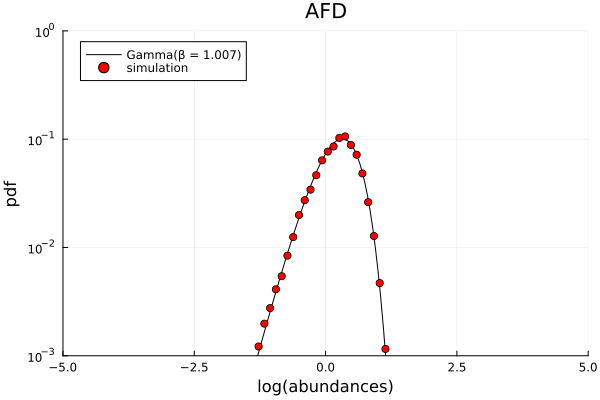

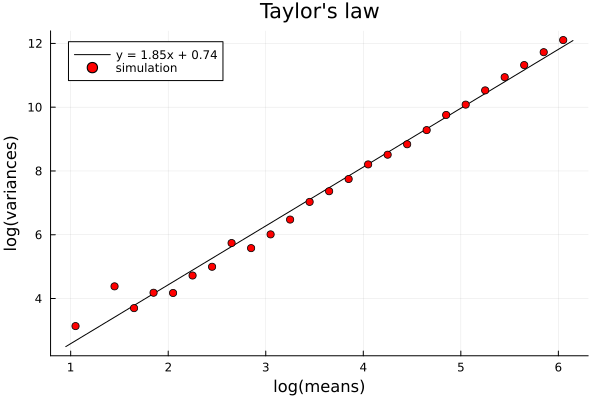

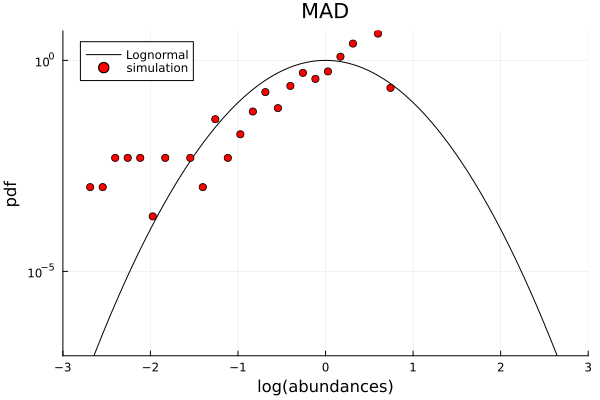

In [14]:
# Compute distributions
afd = PlotDistributions.make_AFD(data; missing_thresh=miss, Δb=0.2, plot_fig=true, plot_title="AFD", data_label="simulation")
taylor = PlotDistributions.make_Taylor(data; missing_thresh=miss, Δb=0.2, plot_fig=true, plot_title="Taylor's law", data_label="simulation")
mad = PlotDistributions.make_MAD(data; missing_thresh=miss, Δb=0.2, plot_fig=true, plot_title="MAD", data_label="simulation")
# crosscorr = PlotDistributions.make_lagCrossCorr(data; Δb=0.05, missing_thresh=miss, lags=lags, make_log=true, plot_fig=true, plot_title="Cross-Correlation")
# lagcorr = PlotDistributions.make_lagCorr(data; missing_thresh=miss, max_lag=max_lag, make_log=true, plot_fig=true, plot_title="Auto-Correlation", data_label="simulation")
# psd = PlotDistributions.make_PSD(data; missing_thresh=miss, freq_range=(-1.0, -0.5), make_log=true, plot_fig=true, plot_title="Power Spectrum Density", data_label="simulation")

fig = afd["fig"]
display(fig)
savefig(fig, "./Images/SLV_AFD.png")

fig = taylor["fig"]
display(fig)
savefig(fig, "./Images/SLV_Taylor.png")

fig = mad["fig"]
display(fig)
# savefig("./Images/SLV_MAD.png")

# fig = crosscorr["fig"]
# display(fig)
# savefig("./Images/SLV_crosscorr.png")

# fig = lagcorr["fig"]
# display(fig)
# savefig("./Images/SLV_autocorr.png")

# fig = psd["fig"]
# display(fig)
# savefig("./Images/SLV_PSD.png")

### Stochastic Exponential Growth

In [100]:
Random.seed!(1234)

# Set conditions for temporal analysis
y0 = 1000 .* rand(N_species)

# Solve model
data = GenerativeModels.exp_growth(N_species, y0, Δt, n; σ=1e-1, p=0.0, ε=ε, skip=skip)
println("Extincted species: ", count(iszero.(data[end,:])))

Extincted species: 1


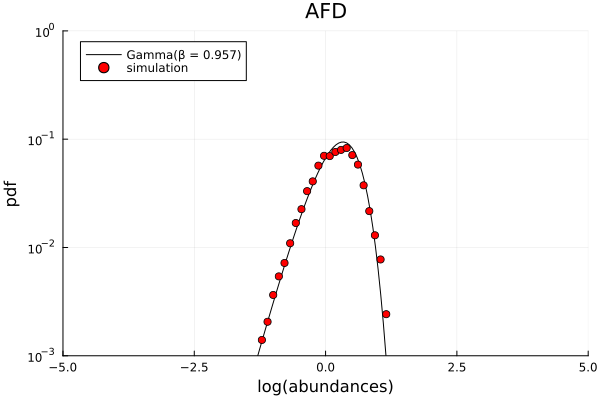

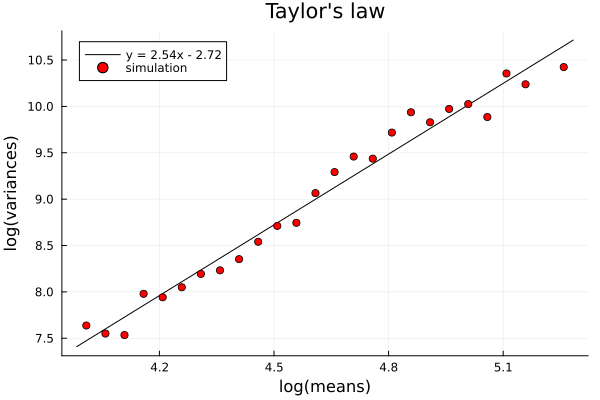

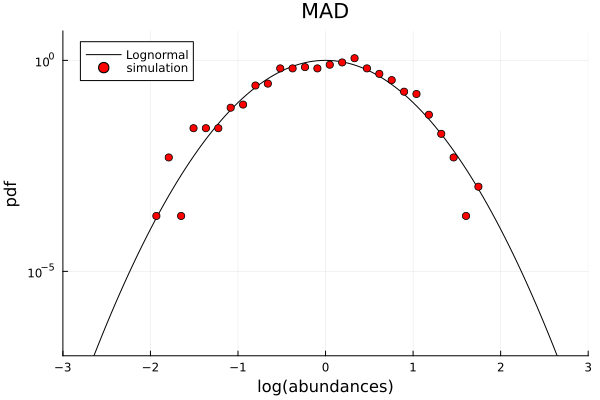

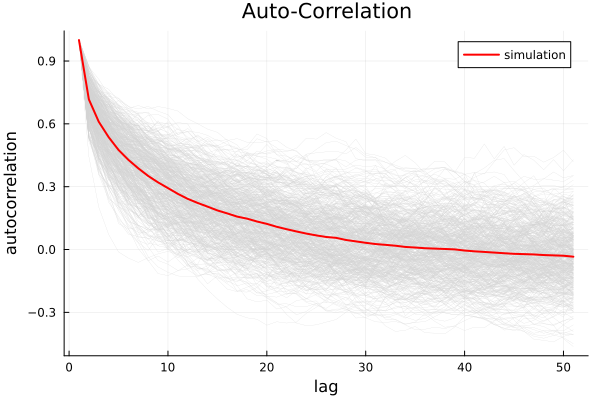

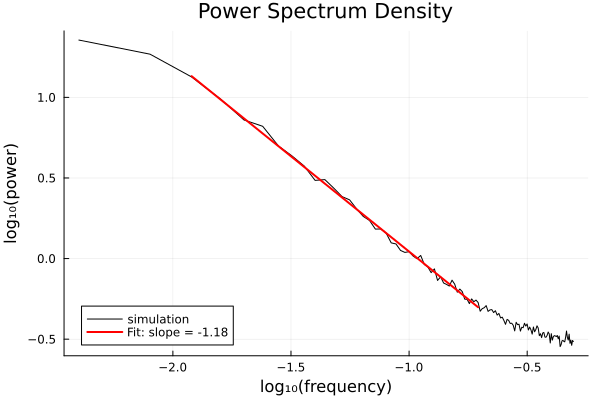

In [98]:
# Compute distributions
afd = PlotDistributions.make_AFD(data; missing_thresh=miss, Δb=0.2, plot_fig=true, plot_title="AFD", data_label="simulation")
taylor = PlotDistributions.make_Taylor(data; missing_thresh=miss, Δb=0.05, plot_fig=true, plot_title="Taylor's law", data_label="simulation")
mad = PlotDistributions.make_MAD(data; missing_thresh=miss, Δb=0.05, plot_fig=true, plot_title="MAD", data_label="simulation")
# crosscorr = PlotDistributions.make_lagCrossCorr(data; Δb=0.05, missing_thresh=miss, lags=lags, make_log=true, plot_fig=true, plot_title="Cross-Correlation")
lagcorr = PlotDistributions.make_lagCorr(data; missing_thresh=miss, max_lag=max_lag, make_log=true, plot_fig=true, plot_title="Auto-Correlation", data_label="simulation")
psd = PlotDistributions.make_PSD(data; missing_thresh=miss, freq_range=(-2.0, -0.7), make_log=true, plot_fig=true, plot_title="Power Spectrum Density", data_label="simulation")

display(afd["fig"])
# savefig("./Images/exp_AFD.png")
display(taylor["fig"])
# savefig("./Images/exp_Taylor.png")
display(mad["fig"])
# savefig("./Images/exp_MAD.png")
# display(crosscorr["fig"])
# savefig("./Images/exp_crosscorr.png")
display(lagcorr["fig"])
# savefig("./Images/exp_autocorr_p05.png")
display(psd["fig"])
# savefig("./Images/exp_PSD.png")

### Statistical model

In [18]:
Random.seed!(1234)

# Set conditions for temporal analysis
mean_abs = rand(LogNormal(), N_species)

# Solve model
data = GenerativeModels.stat_model(N_species, n; β=1.0, mean_abs=mean_abs, ε=ε, skip=skip)
println("Extincted species: ", count(iszero.(data[end,:])))

Extincted species: 0


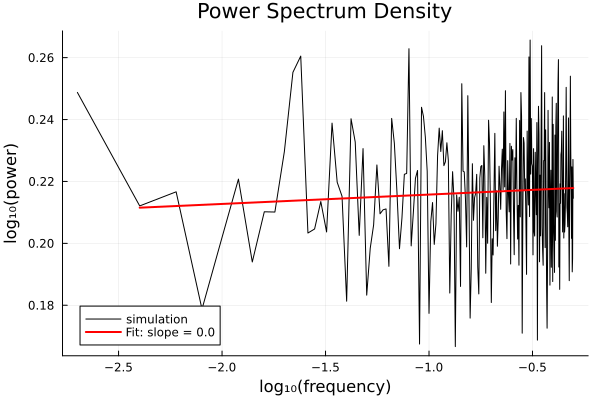

"/home/luca/code/lawsdiv/Images/StatModel_PSD.png"

In [26]:
# Compute distributions
afd = PlotDistributions.make_AFD(data; missing_thresh=miss, Δb=0.2, plot_fig=true, plot_title="AFD", data_label="simulation")
taylor = PlotDistributions.make_Taylor(data; missing_thresh=miss, Δb=0.2, plot_fig=true, plot_title="Taylor's law", data_label="simulation")
mad = PlotDistributions.make_MAD(data; missing_thresh=miss, Δb=0.5, plot_fig=true, plot_title="MAD", data_label="simulation")
crosscorr = PlotDistributions.make_lagCrossCorr(data; Δb=0.05, missing_thresh=miss, lags=[0], make_log=true, plot_fig=true, plot_title="Cross-Correlation")
lagcorr = PlotDistributions.make_lagCorr(data; missing_thresh=miss, max_lag=max_lag, make_log=true, plot_fig=true, plot_title="Auto-Correlation", data_label="simulation")
psd = PlotDistributions.make_PSD(data; missing_thresh=miss, freq_range=(-2.5, 0.0), make_log=true, plot_fig=true, plot_title="Power Spectrum Density", data_label="simulation")

display(afd["fig"])
# savefig("./Images/StatModel_AFD.png")
display(taylor["fig"])
# savefig("./Images/StatModel_Taylor.png")
display(mad["fig"])
# savefig("./Images/StatModel_MAD.png")
display(crosscorr["fig"])
# savefig("./Images/StatModel_crosscorr.png")
display(lagcorr["fig"])
# savefig("./Images/StatModel_autocorr.png")
display(psd["fig"])
# savefig("./Images/StatModel_PSD.png")

### OU exponential growth

In [6]:
Random.seed!(1234)

# Set conditions for temporal analysis
y0 = rand(N_species)
y0 ./= sum(y0)

# Solve model
data = GenerativeModels.OU_growth(N_species, y0, Δt, n; σ=0.1, ε=ε, skip=skip)
println("Extincted species: ", count(iszero.(data[end,:])))

Extincted species: 127


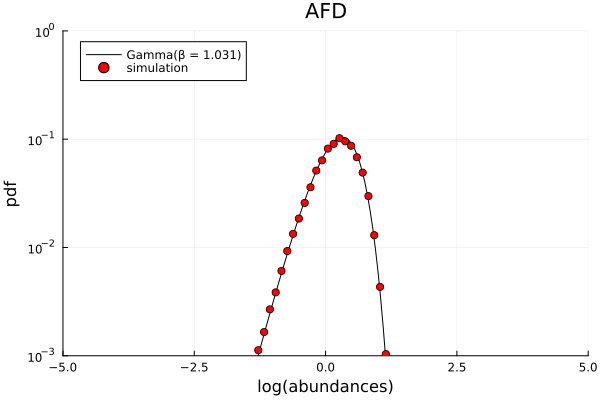

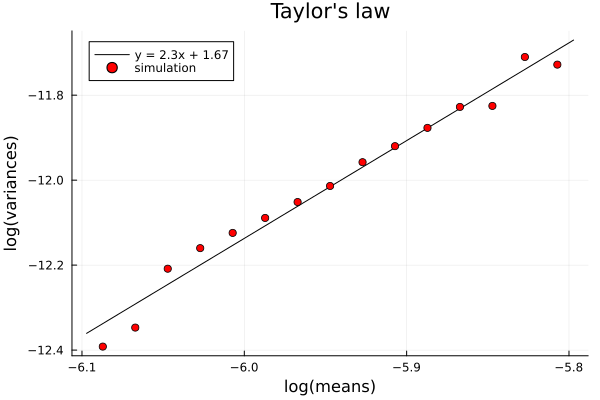

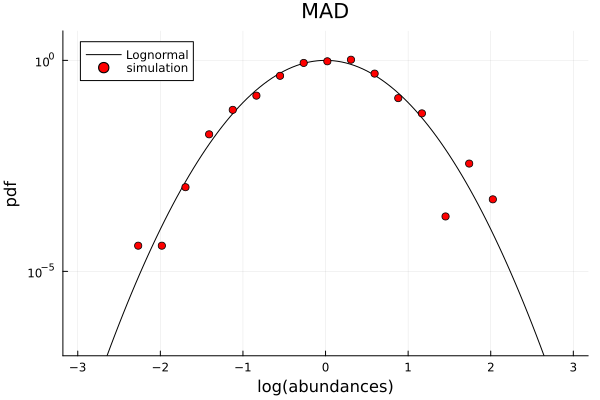

In [7]:
# Compute distributions
afd = PlotDistributions.make_AFD(data; missing_thresh=miss, Δb=0.2, plot_fig=true, plot_title="AFD", data_label="simulation")
taylor = PlotDistributions.make_Taylor(data; missing_thresh=miss, Δb=0.02, plot_fig=true, plot_title="Taylor's law", data_label="simulation")
mad = PlotDistributions.make_MAD(data; missing_thresh=miss, Δb=0.02, plot_fig=true, plot_title="MAD", data_label="simulation")
# crosscorr = PlotDistributions.make_lagCrossCorr(data; Δb=0.05, missing_thresh=miss, lags=lags, make_log=true, plot_fig=true, plot_title="Cross-Correlation")
# lagcorr = PlotDistributions.make_lagCorr(data; missing_thresh=miss, max_lag=max_lag, make_log=true, plot_fig=true, plot_title="Auto-Correlation", data_label="simulation")
# psd = PlotDistributions.make_PSD(data; Δt=Δt, missing_thresh=miss, freq_range=(-0.6,1.2), make_log=true, plot_fig=true, plot_title="Power Spectrum Density", data_label="simulation")

fig = afd["fig"]
display(fig)
# savefig(fig, "./Images/SLM_AFD_skip1.png")

fig = taylor["fig"]
display(fig)
# savefig(fig, "./Images/SLM_Taylor_skip1.png")

fig = mad["fig"]
display(fig)
# savefig("./Images/SLM_MAD_skip1.png")

# fig = crosscorr["fig"]
# display(fig)
# savefig("./Images/SLM_crosscorr_skip1.png")

# fig = lagcorr["fig"]
# display(fig)
# savefig("./Images/SLM_autocorr_skip1.png")

# fig = psd["fig"]
# display(fig)
# savefig("./Images/SLM_PSD_skip1.png")